# Hovercraft Controller Design

In [35]:
# external
import sympy as sy
from IPython.display import display

# project
from main.libs import sympylib as sylib

## Constant Mass Model
We initially assume constant mass to get our feet wet.

In [2]:
# symbols
t = sy.Symbol("t", real=True, positive=True)  # time
g = sy.Symbol("g", real=True, positive=True)  #  # gravity
b = sy.Symbol("b", real=True)  #  # drag coefficient
m = sy.Symbol("m", real=True, positive=True)  #  # mass
F_net = sy.Symbol("F_net", real=True)  # net force
F_d = sy.Symbol("F_d", real=True)  # drag force
F_g = sy.Symbol("F_g", real=True, positive=False)  #  # gravity force

# functions
x = sy.Function("x", real=True)(t)  # altitude
F_t = sy.Function("F_t", real=True, positive=True)(t)  # thrust force

The governing equation of motion is given by the following.

In [3]:
model = sy.Eq(F_net, F_t - F_d - F_g)
display(model)

Eq(F_net, -F_d - F_g + F_t(t))

In [4]:
model = model.subs({F_net: m * x.diff(t, 2), F_d: b * x.diff(t), F_g: m * g})
display(model)

Eq(m*Derivative(x(t), (t, 2)), -b*Derivative(x(t), t) - g*m + F_t(t))

In [40]:
model = sylib.solve_eq(eq=model, symbol=x.diff(t, 2)).expand()
display(model)

Eq(Derivative(x(t), (t, 2)), -b*Derivative(x(t), t)/m - g + F_t(t)/m)

## Non-Constant Mass Model

More true to life is a non-constant mass model. The mass of the craft is depleted as fuel is consumed. We define the mass at any given time as:

\begin{equation}
    m(t) = m_\text{wet} - \int_{0}^{t} \gamma F_t(\tau) d\tau
\end{equation}

\begin{equation}
    F_t(t) = 
    \begin{cases}
        \alpha(t) F_{t,\text{max}} & m(t) > {m_\text{dry}} \\
        0 & m(t) \leq m_\text{dry}
    \end{cases}
\end{equation}

Where $m_\text{wet}$ is the initial or wet mass that includes the mass of the craft and its fuel, and $\gamma$ is the specific thrust (the mass loss rate per unit thrust).

In [7]:
# symbols
tau = sy.Symbol("tau", real=True, positive=True)  # alias for time
m_0 = sy.Symbol("m_0", real=True, positive=True)  # initial mass
gamma = sy.Symbol("gamma", real=True, positive=True)  # specific thrust

In [15]:
model_2 = model.subs(m, m_0 - sy.integrate(gamma * F_t.subs(t, tau), (tau, 0, t)))
display(model_2)

Eq((-gamma*Integral(F_t(tau), (tau, 0, t)) + m_0)*Derivative(x(t), (t, 2)), -b*Derivative(x(t), t) - g*(-gamma*Integral(F_t(tau), (tau, 0, t)) + m_0) + F_t(t))

Solving yeilds:

In [17]:
model_2_soln = sy.dsolve(model_2, x, ics={x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0})
display(model_2_soln)

Eq(x(t), x_0 + Integral((g*gamma*Integral(Integral(F_t(_0), (_0, 0, t))/(gamma*exp(b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))*Integral(F_t(_0), (_0, 0, t)) - m_0*exp(b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))), (t, 0)) - g*gamma*Integral(exp(-b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))*Integral(F_t(_0), (_0, 0, t))/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t) + g*m_0*Integral(exp(-b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t) - g*m_0*Integral(1/(gamma*exp(b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))*Integral(F_t(_0), (_0, 0, t)) - m_0*exp(b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))), (t, 0)) + v_0*exp(-b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), (t, 0))) + Integral(F_t(t)/(gamma*exp(b*Integral(1/(gamma*Integral(F_t(_0), (_0, 0, t)) - m_0), t))*Integral(F_t(_0), (_0, 0, t)) - m_0*exp(b*Integral(1/(gamma*Integral(F_t(_

In [32]:
params_2 = {
    F_t: 10,
    b: 0.1,
    g: 9.81,
    m_0: 1,
    gamma: 0.1,
    x_0: 0,
    v_0: 0,
    F_t.subs(t, "_0"): 10,
}
model_2_soln_eval = model_2_soln.subs(params_2).doit()

print(params_2)
display(model_2_soln_eval)

TypeError: Invalid comparison of non-real zoo

In [30]:
print(model_2_soln_eval)

Eq(x(t), 1.89999999999999*t - 18.9999999999999 + 18.9999999999999*exp(-0.1*t))


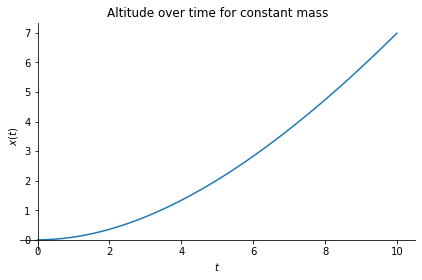

In [31]:
sy.plotting.plot(
    model_2_soln_eval.rhs,
    (t, 0, 10),
    title="Altitude over time for constant mass",
    xlabel="$t$",
    ylabel="$x(t)$",
)